<div style="background-color: lightblue; color: black; padding: 20px; font-weight: bold; font-size: 20px;">Future work done</div>



<div style="background-color: lightblue; color: black; padding: 20px; font-weight: bold; font-size: 15px;">To the current time, the neuefische bootcamp is over. However, I still have some ideas that I would like to implement. This will be investigated here.<br><br>
First, I will reexamine the distribution of the target variable, weekly sales. Afterward, I will apply transformations to the data before proceeding with modeling and evaluating their effects. <br><br>
Second, I am exploring further feature engineering. During the exploratory data analysis (EDA), a correlation has been observed between the target variable and store size, as well as department count. This information is leveraged to create an additional feature. Subsequently, I will assess the impact of this new feature on the predictive performance of the model.<br><br>
In addition, I've created some modules to streamline the process. I've implemented the train-test-split, error metrics and error plotting functionality in separate files, namely 'split.py.' 'metrics.py' and 'error.py'. These modules are then imported and utilized in the notebooks to eliminate code repetition.<br><br>
The most exciting discovery is that the log-transformation of the target variable can reduce the prediction error by approximately $4.5 million.</div>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error

# import self-written functions to get metrics and split data
from metrics import get_metrics
from split import split_data, train_val_test

RSEED=42

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Read data </div>

In [2]:
df = pd.read_pickle('../data/data_combined_clean_features_11.pkl')

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 20px;">01 Transforming target</div>

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Distribution od the target</div>

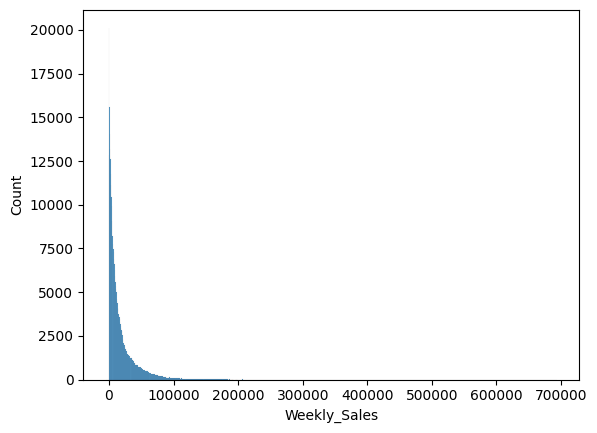

In [3]:
sns.histplot(df.Weekly_Sales);

The distribution is clearly skewed to the right with a few very high values on the left.

In [4]:
# nulls or negative values in the target variable?
df.Weekly_Sales.nsmallest(3)

267730   -4988.94
271300   -1321.48
24830    -1008.96
Name: Weekly_Sales, dtype: float64

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Train test split</div>

In [19]:
#define train, validation and test dataset
X_train, y_train, X_validation, y_validation, X_test, y_test = split_data(df)

# making whole train, validation and test dataset accessable
train, validation, test = train_val_test(df)

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Arcsinh-transformation</div><br>

The Arcsinh-transformation can handle negative values.

In [6]:
arc_transformed_y_train = np.arcsinh(y_train)


<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Best model</div>

In [7]:
# instantiate model
model = ExtraTreesRegressor(
    max_depth=25, 
    max_features=0.5, 
    min_samples_leaf=1, 
    n_estimators= 100,
    random_state=42)

# fit the model with train data 
model.fit(X_train, arc_transformed_y_train)

# Make predictions
arc_transformed_y_pred_train = model.predict(X_train)
arc_transformed_y_pred_validation = model.predict(X_validation)
arc_transformed_y_pred_test = model.predict(X_test)

In [8]:
# re-transform predictions
y_pred_train = np.sinh(arc_transformed_y_pred_train)
y_pred_validation = np.sinh(arc_transformed_y_pred_validation)
y_pred_test = np.sinh(arc_transformed_y_pred_test)

In [9]:
get_metrics(y_train, y_pred_train, 'Train')
get_metrics(y_validation, y_pred_validation, 'Validation')
get_metrics(y_test, y_pred_test, 'Test')

- - - - - - - - - - 
Metrics for Train
Mean weekly sales: 17639.364
Standard deviation weekly sales: 23534.607
MSE: 1696588.116
RMSE: 1302.531
- - - - - - - - - - 
- - - - - - - - - - 
Metrics for Validation
Mean weekly sales: 17342.499
Standard deviation weekly sales: 22893.483
MSE: 10976927.508
RMSE: 3313.145
- - - - - - - - - - 
- - - - - - - - - - 
Metrics for Test
Mean weekly sales: 17402.01
Standard deviation weekly sales: 22530.901
MSE: 7055501.648
RMSE: 2656.219
- - - - - - - - - - 


Slightly better results and less overfitting compared to the best model used in our presentation.

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Now testing Log-transformation</div>

In [10]:
# reread data
df = pd.read_pickle('../data/data_combined_clean_features_11.pkl')

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Train test split</div>

In [31]:
#define train, validation and test dataset
X_train, y_train, X_validation, y_validation, X_test, y_test = split_data(df)

# making whole train, validation and test dataset accessable
train, validation, test = train_val_test(df)

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Log-Transformation of the target</div>

A constant is added so that the log transformation can handle negative values and zeros in the target. The 5000 was chosen because it covers the range in the negative number space that occurs in the data.

In [12]:
#log-transformation
log_transformed_y_train = y_train.apply(lambda x: np.log(x+5000))

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Best model</div>

In [13]:
# instantiate model
model = ExtraTreesRegressor(
    max_depth=25, 
    max_features=0.5, 
    min_samples_leaf=1, 
    n_estimators= 100,
    random_state=42)

# fit the model with train data 
model.fit(X_train, log_transformed_y_train)

# Make predictions
log_transformed_y_pred_train = pd.Series(model.predict(X_train))
log_transformed_y_pred_validation = pd.Series(model.predict(X_validation))
log_transformed_y_pred_test = pd.Series(model.predict(X_test))

In [14]:
# re-transform predictions
y_pred_train = log_transformed_y_pred_train.apply(lambda x: np.exp(x) - 5000)
y_pred_validation = log_transformed_y_pred_validation.apply(lambda x: np.exp(x) - 5000)
y_pred_test = log_transformed_y_pred_test.apply(lambda x: np.exp(x) - 5000)

In [15]:
get_metrics(y_train, y_pred_train, 'Train')
get_metrics(y_validation, y_pred_validation, 'Validation')
get_metrics(y_test, y_pred_test, 'Test')

- - - - - - - - - - 
Metrics for Train
Mean weekly sales: 17639.364
Standard deviation weekly sales: 23534.607
MSE: 1434091.198
RMSE: 1197.535
- - - - - - - - - - 
- - - - - - - - - - 
Metrics for Validation
Mean weekly sales: 17342.499
Standard deviation weekly sales: 22893.483
MSE: 10709945.315
RMSE: 3272.605
- - - - - - - - - - 
- - - - - - - - - - 
Metrics for Test
Mean weekly sales: 17402.01
Standard deviation weekly sales: 22530.901
MSE: 6936656.921
RMSE: 2633.753
- - - - - - - - - - 


The intermediate log transformation of the target variable improves the result to the model from the presentation by about 47$ on validation data and 28$ on test data.

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Adding predicted values to train, validation and test dataframe</div>

In [20]:
train['Predicted_Sales'] = y_pred_train
validation['Predicted_Sales'] = y_pred_validation
test['Predicted_Sales'] = y_pred_test

In [21]:
validation_and_test = pd.concat([validation, test], axis=0)

In [22]:
get_metrics(validation_and_test.Weekly_Sales, 
            validation_and_test.Predicted_Sales, 'Validation and Test')

- - - - - - - - - - 
Metrics for Validation and Test
Mean weekly sales: 17370.179
Standard deviation weekly sales: 22725.48
MSE: 8954927.457
RMSE: 2992.478
- - - - - - - - - - 


Thr RMSE for the whole prediction period has been improved from 3031.452 to 2992.478.

In [23]:
old_best_RMSE = 3031
print('Prediction error best model without log-transformation:', validation_and_test.shape[0]*old_best_RMSE)

Prediction error best model without log-transformation: 346685780


In [24]:
new_best_RMSE = 2992
print('Prediction error best model with log transformation:', validation_and_test.shape[0]*new_best_RMSE)

Prediction error best model with log transformation: 342224960


In [25]:
validation_and_test.shape[0]*old_best_RMSE-validation_and_test.shape[0]*new_best_RMSE

4460820

The reduction in prediction error is about 4.5 Mio$.

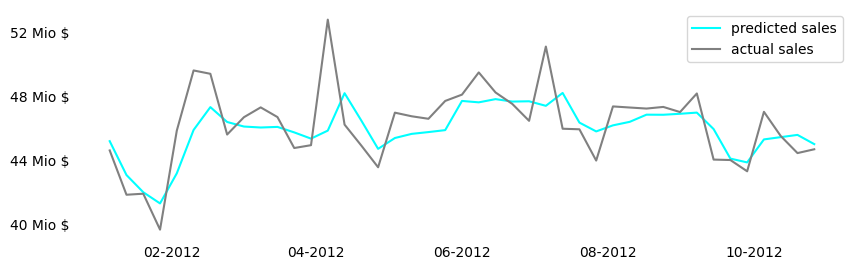

In [26]:
plt.figure(figsize=(10, 3))

#plotting lines for predicted and actual sales
sns.lineplot(data=validation_and_test, x='Date', 
             y=validation_and_test.groupby(['Date'])['Predicted_Sales'].transform('sum'), 
             label='predicted sales', errorbar=None,
             color='cyan')
sns.lineplot(data=validation_and_test, x='Date', 
             y=validation_and_test.groupby(['Date'])['Weekly_Sales'].transform('sum'), 
             label ='actual sales', color='grey', 
             errorbar=None) #linestyle='--', 

# y ticks formatting
plt.gca().yaxis.set_major_formatter(lambda x, _: f'{x / 1e6:.0f} Mio $')
ytick_positions = [plt.gca().get_yticks()[1], plt.gca().get_yticks()[3], 
                   plt.gca().get_yticks()[5], plt.gca().get_yticks()[7]]

plt.gca().set_yticks(ytick_positions)
plt.gca().tick_params(axis='y', which='both', length=0)

# x ticks formatting
from matplotlib.dates import DateFormatter
date_format = DateFormatter("%m-%Y")
plt.gca().xaxis.set_major_formatter(date_format)

xtick_positions = [plt.gca().get_xticks()[1], plt.gca().get_xticks()[3], 
                   plt.gca().get_xticks()[5], plt.gca().get_xticks()[7],
                   plt.gca().get_xticks()[9]]

plt.gca().set_xticks(xtick_positions)
plt.gca().tick_params(axis='x', which='both', length=0)

sns.despine(top=True, right=True, left=True, bottom=True)

plt.title('')#Prediction period - Weekly sales actual vs predicted 
plt.ylabel('')#weekly sales
plt.xlabel('')#Date
plt.legend();

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 20px;">02 Feature Engineering <br></div><div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">
As seen in the presentation store size and number of departments show the highest correlations with the target. Now Im am trying to improve predictive power by enineering features of them.</div>

In [27]:
# reread data
df = pd.read_pickle('../data/data_combined_clean_features_11.pkl')

In [28]:
# create new column with number of departments per store
df['Dept_Count'] = df.groupby('Store')['Dept'].transform('nunique')

In [30]:
# create new column with relation of size and depatment number
df['Size_Dept'] = df.Size/df.Dept_Count

In [ ]:
#drop column with number of departments per store
df.drop(columns='Dept_Count', inplace=True)

In [ ]:
#define train, validation and test dataset
X_train, y_train, X_validation, y_validation, X_test, y_test = split_data(df)

# making whole train, validation and test dataset accessable
train, validation, test = train_val_test(df)

In [ ]:
# instantiate model
model = ExtraTreesRegressor(
    max_depth=25, 
    max_features=0.5, 
    min_samples_leaf=1, 
    n_estimators= 100,
    random_state=42)

# fit the model with train data 
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_validation = model.predict(X_validation)
y_pred_test = model.predict(X_test)

In [ ]:
get_metrics(y_train, y_pred_train, 'Train')
get_metrics(y_validation, y_pred_validation, 'Validation')
get_metrics(y_test, y_pred_test, 'Test')

- - - - - - - - - - 
Metrics for Train
Mean weekly sales: 17639.364
Standard deviation weekly sales: 23534.607
MSE: 1122838.883
RMSE: 1059.641
- - - - - - - - - - 
- - - - - - - - - - 
Metrics for Validation
Mean weekly sales: 17342.499
Standard deviation weekly sales: 22893.483
MSE: 11009752.697
RMSE: 3318.095
- - - - - - - - - - 
- - - - - - - - - - 
Metrics for Test
Mean weekly sales: 17402.01
Standard deviation weekly sales: 22530.901
MSE: 7018232.078
RMSE: 2649.195
- - - - - - - - - - 


In [ ]:
train['Predicted_Sales'] = y_pred_train
validation['Predicted_Sales'] = y_pred_validation
test['Predicted_Sales'] = y_pred_test

In [ ]:
validation_and_test = pd.concat([validation, test], axis=0)

In [ ]:
get_metrics(validation_and_test.Weekly_Sales, 
            validation_and_test.Predicted_Sales, 'Validation and Test')

- - - - - - - - - - 
Metrics for Validation and Test
Mean weekly sales: 17370.179
Standard deviation weekly sales: 22725.48
MSE: 9153231.479
RMSE: 3025.431
- - - - - - - - - - 


Since log transformation was not used here, the RMSE is compared to the original best model from the presentation. The new feature adds a small improvement by reducing the RMSE from 3031.452 to 3025.431.